# Analisa Data Harga Rumah di Boston  
Setiap data dalam basis data ini menggambarkan sebuah daerah pinggiran atau kota di Boston. Data ini diambil dari wilayah Boston Standard Metropolitan Statistical Area (SMSA) pada tahun 1970.  
**Sumber data :** (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data)

| Nama Kolom  | Deskripsi                                                         |
| ----------- | ---------------------------------------------------------------------------------------- |
| **CRIM**    | Tingkat kejahatan per kapita di setiap kota                                              |
| **ZN**      | Proporsi lahan perumahan yang diperuntukkan untuk kavling lebih dari 25.000 kaki persegi |
| **INDUS**   | Proporsi luas area bisnis non-ritel di setiap kota                                       |
| **CHAS**    | Variabel dummy Sungai Charles (1 jika wilayah berbatasan dengan sungai, 0 jika tidak)    |
| **NOX**     | Konsentrasi nitrogen oksida (dalam satuan per 10 juta)                                   |
| **RM**      | Rata-rata jumlah kamar per rumah tinggal                                                 |
| **AGE**     | Proporsi rumah yang dihuni pemilik dan dibangun sebelum tahun 1940                       |
| **DIS**     | Jarak tertimbang ke lima pusat pekerjaan di Boston                                       |
| **RAD**     | Indeks aksesibilitas ke jalan raya radial                                                |
| **TAX**     | Tarif pajak properti penuh per \$10.000 nilai properti                                   |
| **PTRATIO** | Rasio murid-guru di tiap kota                                                            |
| **B**       | 1000 × (Bk − 0,63)², di mana Bk adalah proporsi penduduk kulit hitam di kota tersebut    |
| **LSTAT**   | Persentase penduduk dengan status sosial ekonomi rendah                                  |


### Import Data

In [111]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer

In [48]:
data =pd.read_csv('data/housing.csv')
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


### Preprocessing

In [49]:
data =pd.read_csv('data/housing.csv', sep='\s+', header=None)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

In [50]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
#cek ukuran data
data.shape

(506, 14)

In [52]:
#cek tipe data yang digunakan
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [53]:
#identifikasi isi dataset yang uniq
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [54]:
#cek missing value
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [55]:
#cek baris yang memiliki missing value
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [56]:
#melihat statistik deskriptif dari data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.to_excel('data/housing_cleaned.xlsx', index=False)

### Research Question
1. Faktor apa saja yang paling berpengaruh terhadap harga rumah di Boston?
2. Apakah tingkat kejahatan (CRIM) berpengaruh negatif terhadap harga rumah?
3. Apakah rasio murid-guru (PTRATIO) berkorelasi dengan harga rumah?
4. Apakah kedekatan dengan Sungai Charles (CHAS) berdampak signifikan terhadap harga rumah?
5. Apakah rumah di area dengan pajak tinggi (TAX) memiliki harga jual lebih rendah?
6. Bagaimana pengaruh status sosial ekonomi (LSTAT) terhadap harga rumah?

#### 1. Faktor yang paling berpengaruh terhadap harga rumah

<Axes: >

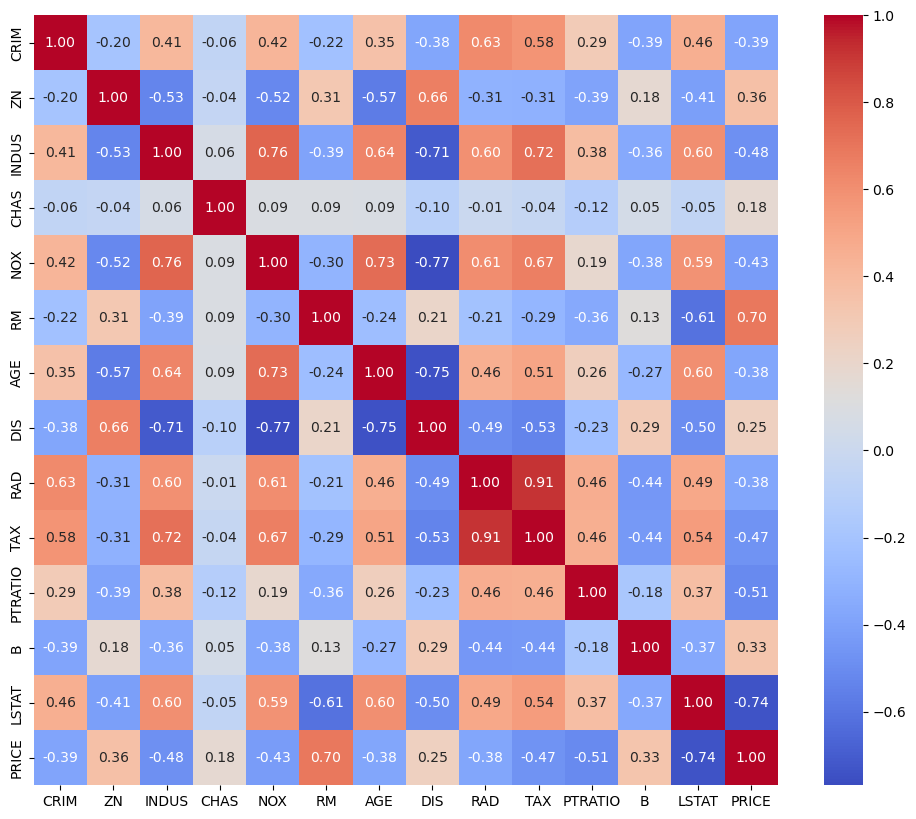

In [57]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

**hasil** :
Yang paling berpengaruh terhadap harga rumah adalah **RM, ZN, B, DIS**  
Jadi harga rumah di Boston paling dipengaruhi oleh:
- Rata - rata jumlah kamar per rumah tinggal
- Proposi lahan perumahan yang diperuntukkan untuk kavling lebih dari 25.000 kaki persegi 
- Perbedaan rasial dalam kavling
- Jarak tertimbang ke lima pusat pekerjaan di Boston.  
  
Harga rumah di Boston paling dipengaruhi oleh rata-rata jumlah kamar, karena variabel ini memiliki korelasi tertinggi terhadap harga. Semakin banyak jumlah kamar, semakin besar pula daya tarik rumah tersebut bagi calon pembeli, karena mereka cenderung mencari ruang yang lebih luas dan nyaman untuk ditinggali bersama keluarga atau untuk investasi jangka panjang.

#### 2. Tingkat kejahatan berpengaruh negatif terhadap harga rumah

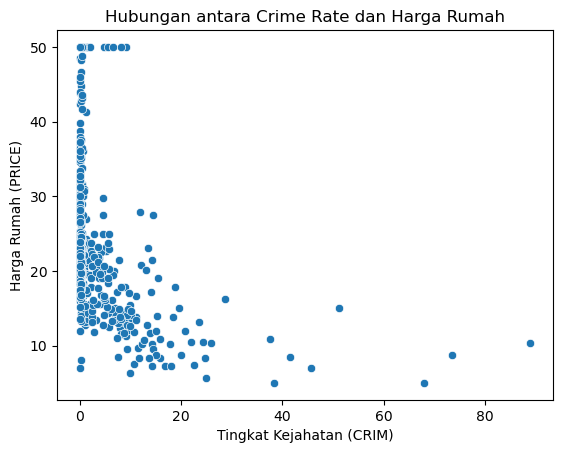

In [58]:
sns.scatterplot(x='CRIM', y='PRICE', data=data)
plt.title('Hubungan antara Crime Rate dan Harga Rumah')
plt.xlabel('Tingkat Kejahatan (CRIM)')
plt.ylabel('Harga Rumah (PRICE)')
plt.show()

**hasil :**  
Dari grafik scatterplot terlihat pola yang cukup jelas: semakin tinggi tingkat kejahatan di suatu area, semakin rendah harga rumahnya. Misalnya, pada area dengan tingkat kejahatan antara 0 hingga 20, harga rumah cenderung tinggi dan stabil, ini bisa disebut sebagai zona "aman" yang paling diminati. Sebaliknya, pada area dengan tingkat kejahatan di atas 60, harga rumah anjlok tajam, menunjukkan bahwa keamanan menjadi faktor krusial dalam menentukan nilai properti.

#### 3. Rasio murid-guru berkorelasi dengan harga rumah?

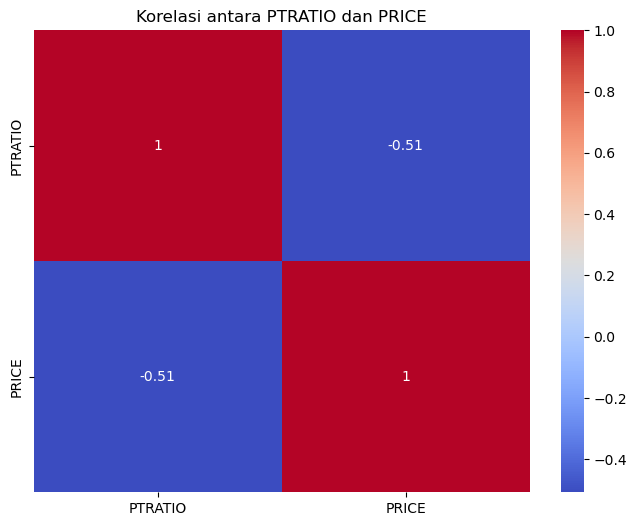

In [59]:
corr = data[['PTRATIO', 'PRICE']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data[['PTRATIO', 'PRICE']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara PTRATIO dan PRICE")
plt.show()

**hasil :**  
Korelasi sebesar -0.51 antara rasio murid-guru (PTRATIO) dan harga rumah (PRICE) menunjukkan bahwa ada hubungan negatif sedang antara kedua variabel tersebut. Artinya:  
- Semakin tinggi rasio murid-guru (lebih banyak murid per guru, kualitas pendidikan cenderung menurun)
- Semakin rendah harga rumah.  
  
Masyarakat cenderung menilai kualitas pendidikan sebagai faktor penting dalam memilih tempat tinggal. Jika suatu daerah memiliki rasio murid-guru yang tinggi, itu bisa menjadi indikator bahwa sekolah di sana terlalu padat atau kurang tenaga pengajar, yang membuat wilayah tersebut kurang diminati, sehingga menurunkan nilai properti.

#### 4. Kedekatan dengan Sungai berdampak signifikan terhadap harga rumah

In [60]:
data.groupby('CHAS')['PRICE'].mean()

CHAS
0    22.093843
1    28.440000
Name: PRICE, dtype: float64

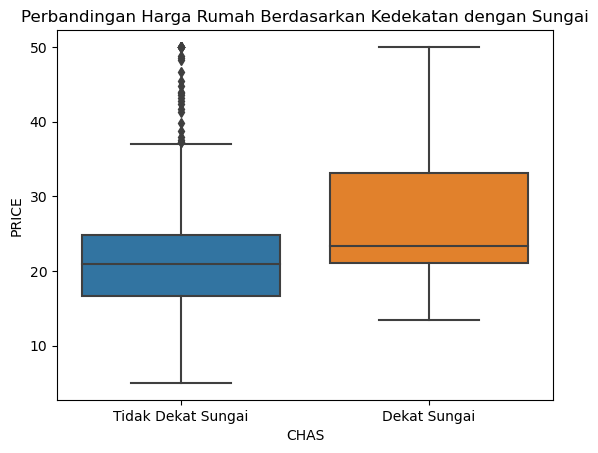

In [61]:
sns.boxplot(x='CHAS', y='PRICE', data=data)
plt.xticks([0, 1], ['Tidak Dekat Sungai', 'Dekat Sungai'])
plt.title("Perbandingan Harga Rumah Berdasarkan Kedekatan dengan Sungai")
plt.show()

**hasil :**  
Secara umum rata - rata harga rumah yang berada di dekat sungai cenderung lebih mahal, Kemudian berdasarkan bloxplot:  
- Median harga rumah untuk CHAS = 1 lebih tinggi dibanding CHAS = 0 → menunjukkan bahwa rumah yang dekat dengan sungai cenderung memiliki harga lebih mahal.
- Boxplot CHAS = 1 memiliki kotak yang lebih lebar → artinya harga rumah yang dekat sungai memiliki variasi yang lebih besar, atau rentang harga yang lebih lebar.
- Terdapat outlier pada CHAS = 0 yang berada di atas nilai maksimum → menandakan bahwa meskipun rumah yang jauh dari sungai cenderung lebih murah, ada beberapa rumah yang berharga sangat tinggi, namun jarang terjadi.  
  
Rumah yang berada dekat dengan sungai (CHAS = 1) cenderung memiliki harga lebih tinggi dan lebih bervariasi dibanding rumah yang jauh dari sungai. Kehadiran outlier pada CHAS = 0 menunjukkan ada pengecualian di mana beberapa rumah jauh dari sungai bisa memiliki harga tinggi, meskipun jarang terjadi.

#### 5. Rumah di area dengan pajak tinggi memiliki harga jual lebih rendah

In [62]:
correlation = data['TAX'].corr(data['PRICE'])
print(f'Korelasi antara TAX dan PRICE: {correlation}')

Korelasi antara TAX dan PRICE: -0.46853593356776724


In [63]:
data['TAX_Group'] = pd.qcut(data['TAX'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
print(data.groupby('TAX_Group')['PRICE'].mean())

TAX_Group
Rendah    27.124419
Sedang    23.695783
Tinggi    16.682738
Name: PRICE, dtype: float64


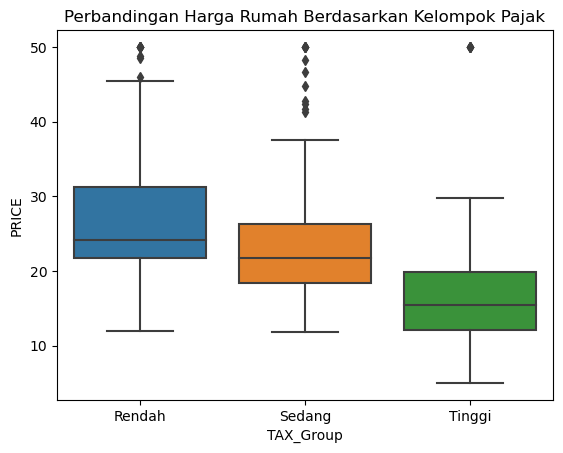

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='TAX_Group', y='PRICE', data=data)
plt.title("Perbandingan Harga Rumah Berdasarkan Kelompok Pajak")
plt.show()

**hasil :**  
Dari hasil korelasi antara tinggi pajak terhadap harga rumah adalah -0.47 yang berarti semakin tinggi pajak maka harga rumah semakin turun, kemudian dengan membagi tinggi pajak menjadi tiga bagian yaitu rendah, sedang, dan tinggi mendapatkan hasil:  
- Median harga rumah pada kelompok pajak tinggi lebih rendah dibanding kelompok pajak sedang dan rendah. Hal ini menunjukkan bahwa beban pajak yang tinggi kemungkinan besar menurunkan daya tarik sebuah properti, sehingga menekan harga jualnya.
- Boxplot kelompok pajak tinggi memiliki kotak yang sempit, yang berarti sebaran harga rumah di area dengan pajak tinggi lebih homogen dan cenderung terkonsentrasi pada kisaran harga yang lebih rendah.
- Terdapat banyak outlier pada kelompok pajak sedang, sementara kelompok pajak tinggi hanya memiliki sedikit outlier. Ini mengindikasikan bahwa di wilayah pajak sedang, variasi harga rumah jauh lebih besar dan ada rumah-rumah yang bernilai sangat tinggi, sedangkan di wilayah pajak tinggi, harga rumah cenderung stabil namun tetap rendah.  
  
Hasil analisis mendukung research question bahwa rumah di area dengan pajak tinggi memiliki harga jual yang lebih rendah. Hal ini ditunjukkan oleh korelasi negatif sebesar -0.47 antara pajak dan harga rumah, serta median harga yang lebih rendah pada kelompok pajak tinggi. Sebaran harga yang sempit di area pajak tinggi juga menunjukkan bahwa harga rumah cenderung stabil namun tetap rendah di wilayah tersebut.

### Linear Regression

In [121]:
data =pd.read_csv('data/housing.csv', sep='\s+', header=None)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

In [97]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
model.coef_
model.intercept_

30.246750993924394

In [100]:
y_pred = model.predict(X_test)


In [101]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 3.189091965887843
Mean Squared Error: 24.29111947497345
R^2 Score: 0.6687594935356329


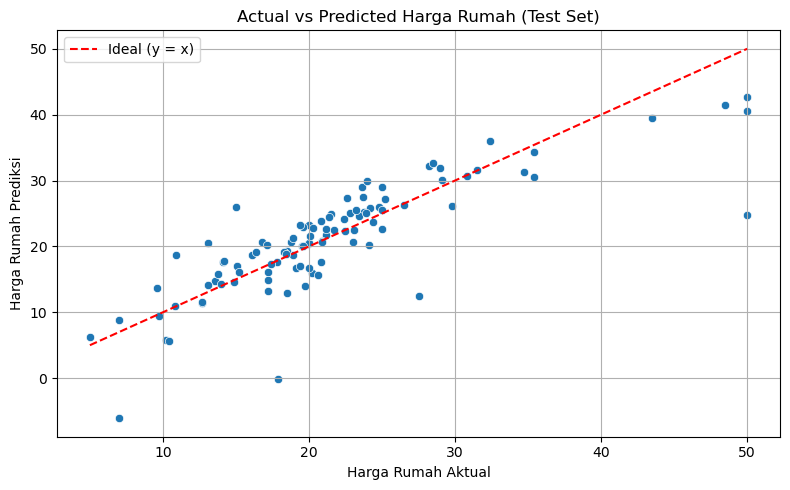

In [102]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Actual', y='Predicted', data=result_df)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal (y = x)')

plt.title('Actual vs Predicted Harga Rumah (Test Set)')
plt.xlabel('Harga Rumah Aktual')
plt.ylabel('Harga Rumah Prediksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Normalizer Scalling Before Remove Outliers

In [112]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [115]:
model = LinearRegression()

In [116]:
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 3.0594698815245813
Mean Squared Error: 23.111795411360273
R^2 Score: 0.6848410866676131


#### Remove Outliers

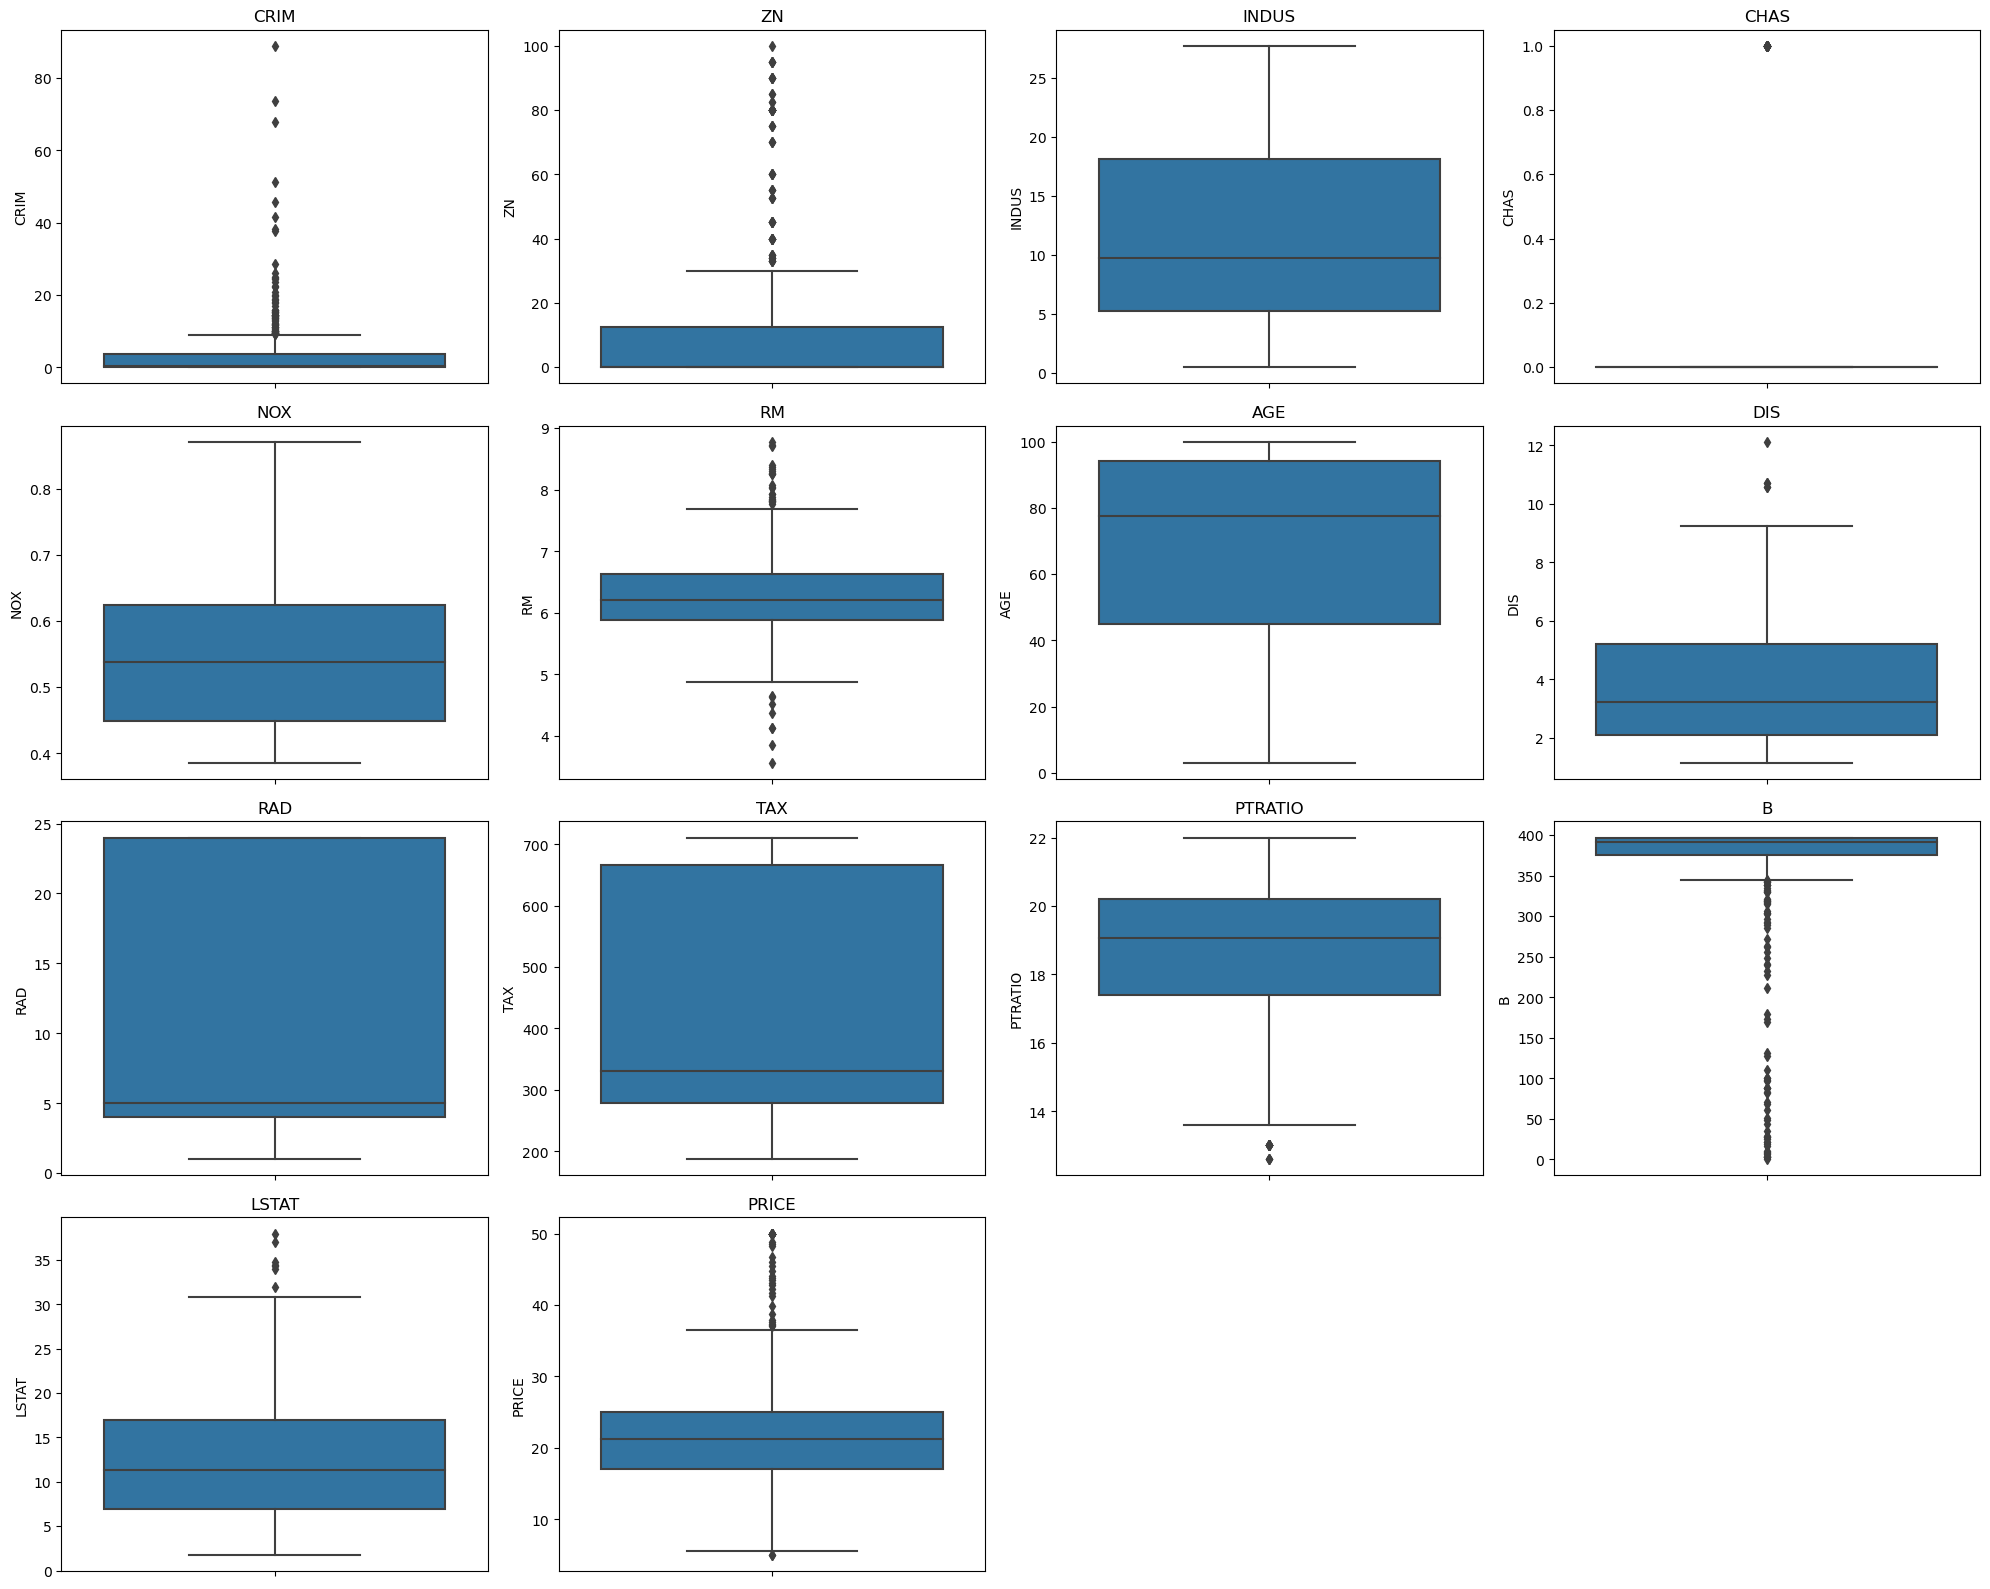

In [122]:
# Check for outliers using boxplots:
numeric_cols = data.select_dtypes(exclude='object').columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [123]:
# Use IQR method to identify outliers for numerical features:
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in CRIM: 66
Outliers in ZN: 68
Outliers in INDUS: 0
Outliers in CHAS: 35
Outliers in NOX: 0
Outliers in RM: 30
Outliers in AGE: 0
Outliers in DIS: 5
Outliers in RAD: 0
Outliers in TAX: 0
Outliers in PTRATIO: 15
Outliers in B: 77
Outliers in LSTAT: 7
Outliers in PRICE: 40


In [ ]:
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [125]:
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower, upper=upper)

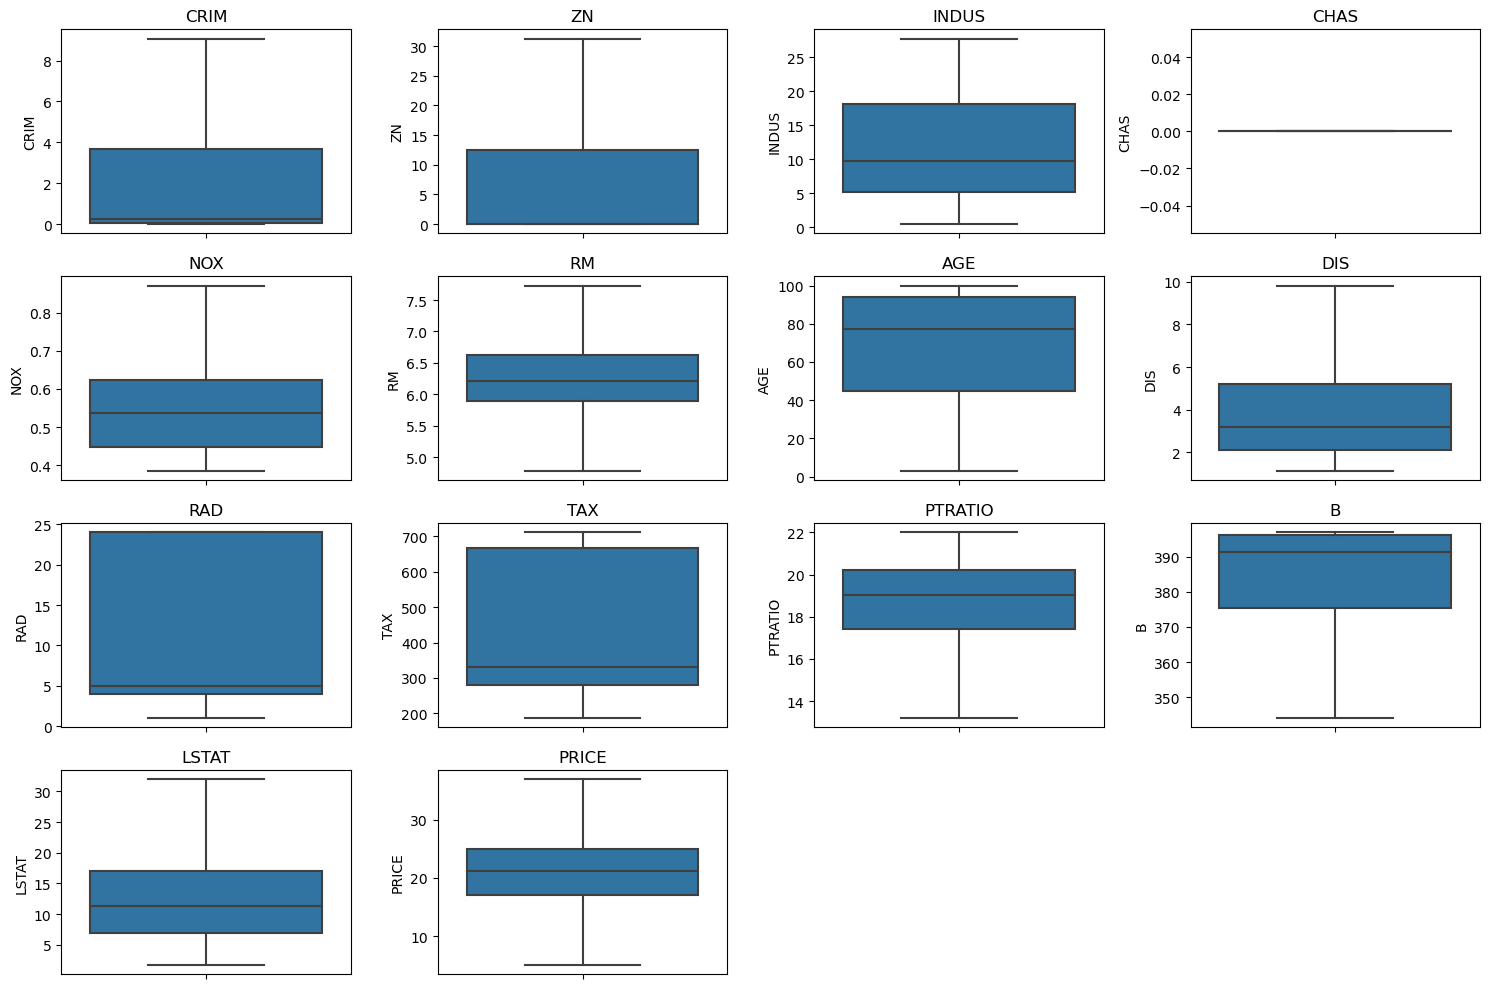

In [126]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [129]:
# Use IQR method to identify outliers for numerical features:
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in CRIM: 0
Outliers in ZN: 0
Outliers in INDUS: 0
Outliers in CHAS: 0
Outliers in NOX: 0
Outliers in RM: 0
Outliers in AGE: 0
Outliers in DIS: 0
Outliers in RAD: 0
Outliers in TAX: 0
Outliers in PTRATIO: 0
Outliers in B: 0
Outliers in LSTAT: 0
Outliers in PRICE: 0


In [128]:
data.shape

(506, 14)

#### Normalizer Scaling After Remove Ouliers

In [130]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = model.predict(X_test)

In [136]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 2.39119975606372
Mean Squared Error: 12.438378177580134
R^2 Score: 0.745766154636992


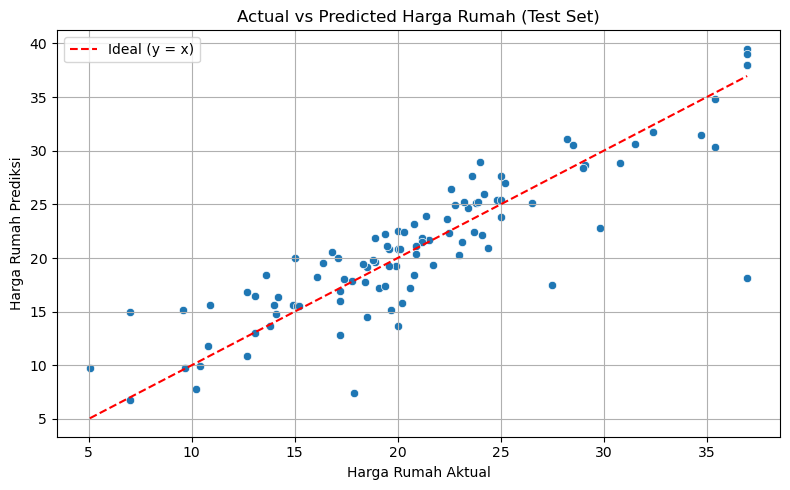

In [137]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Actual', y='Predicted', data=result_df)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal (y = x)')

plt.title('Actual vs Predicted Harga Rumah (Test Set)')
plt.xlabel('Harga Rumah Aktual')
plt.ylabel('Harga Rumah Prediksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [138]:
for i in range(5):
    print(f"predicated: {y_pred[i]:.2f} | Actual: {y[i]}")

predicated: 27.67 | Actual: 24.0
predicated: 31.73 | Actual: 21.6
predicated: 18.37 | Actual: 34.7
predicated: 24.98 | Actual: 33.4
predicated: 18.24 | Actual: 36.2
